# Credit Card Fraud Detection using XGBoost and Autoencoder

---

🎯 **Objective:**
Build a hybrid machine learning and deep learning model that combines the power of XGBoost (for classification) and Autoencoder (for anomaly detection) to effectively detect fraudulent credit card transactions.

---

In [2]:
# 📦 Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
# 📂 Step 2: Load the Dataset

df = pd.read_csv(r'E:\VITB\Personal Projects\FraudShield\dataset\creditcard.csv')
print(f"Dataset Shape: {df.shape}")
print(df.head())

Dataset Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [4]:
# 🧹 Step 3: Basic EDA (Exploratory Data Analysis)

df.info()
df.describe()
df["Class"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    284315
1       492
Name: count, dtype: int64


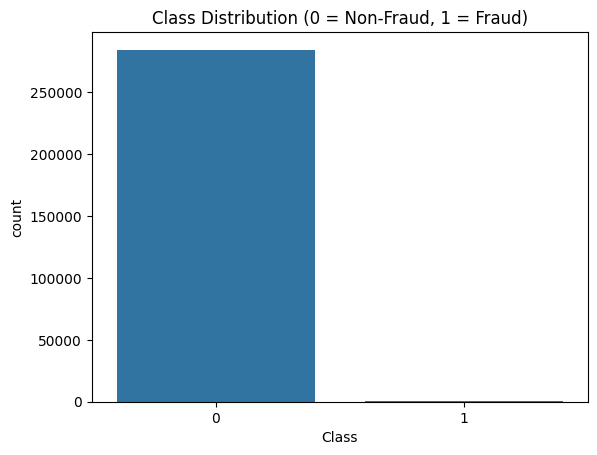

In [5]:
# 📊 Step 4: Visualize Class Distribution

print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

In [6]:
# 🧮 Step 5: Feature Scaling for 'Time' and 'Amount'

scaler = StandardScaler()
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [7]:
# 🧾 Step 6: Rearranging Columns for Consistency

scaled = ['scaled_time', 'scaled_amount']
others = [col for col in df.columns if col not in scaled + ['Class']]
df = df[scaled + others + ['Class']]

In [8]:
# 🧪 Step 7: Split Features and Target

X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(f"Balanced class counts:\n{pd.Series(y_res).value_counts()}")

Balanced class counts:
Class
0    284315
1    284315
Name: count, dtype: int64


In [10]:
# 🧼 Step 8: Split into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (454904, 30), Test shape: (113726, 30)


In [11]:
# ⚙️ Step 9: Train XGBoost Classifier

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Create and train the model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [12]:
# 📈 Step 10: Evaluate XGBoost on Test Set
# Predict
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Confusion Matrix & Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC-AUC Score
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc:.4f}")

[[56563   300]
 [  213 56650]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.99      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC Score: 0.9998


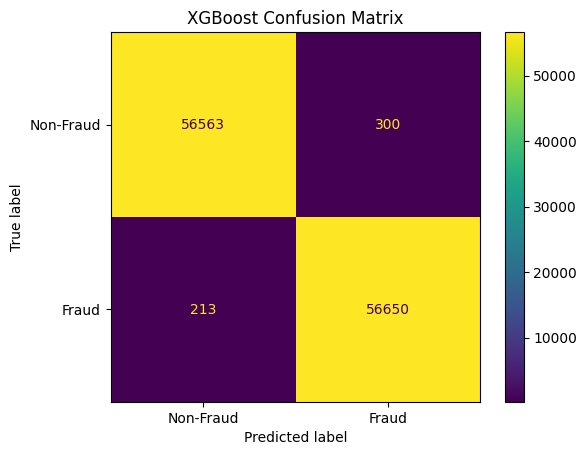

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.title("XGBoost Confusion Matrix")
plt.show()

In [14]:
# 🧠 Step 11: Train Autoencoder (on Non-Fraud Only)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Filter only normal transactions (Class = 0)
X_auto = X[y == 0]
print(f"Training autoencoder on {X_auto.shape[0]} non-fraud samples")
input_dim = X_auto.shape[1]

# Define autoencoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(14, activation='relu', activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoder = Dense(7, activation='relu')(encoder)
decoder = Dense(14, activation='relu')(encoder)
output_layer = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')


Training autoencoder on 284315 non-fraud samples





In [15]:
history = autoencoder.fit(
    X_auto, X_auto,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10

889/889 [==============================] - 2s 2ms/step - loss: 0.7529 - val_loss: 0.5661
Epoch 2/10
889/889 [==============================] - 1s 1ms/step - loss: 0.4687 - val_loss: 0.4613
Epoch 3/10
889/889 [==============================] - 1s 1ms/step - loss: 0.4088 - val_loss: 0.4255
Epoch 4/10
889/889 [==============================] - 1s 1ms/step - loss: 0.3844 - val_loss: 0.4078
Epoch 5/10
889/889 [==============================] - 1s 1ms/step - loss: 0.3699 - val_loss: 0.3979
Epoch 6/10
889/889 [==============================] - 1s 1ms/step - loss: 0.3593 - val_loss: 0.3916
Epoch 7/10
889/889 [==============================] - 1s 1ms/step - loss: 0.3502 - val_loss: 0.3775
Epoch 8/10
889/889 [==============================] - 1s 1ms/step - loss: 0.3433 - val_loss: 0.3846
Epoch 9/10
889/889 [==============================] - 1s 1ms/step - loss: 0.3379 - val_loss: 0.3722
Epoch 10/10
889/889 [==============================] - 1s 1ms/step - loss: 0.3341 - val_loss: 0.370

In [16]:
# 🔍 Step 12: Evaluate Autoencoder Reconstruction Error
# Reconstruct X_test
reconstructions = autoencoder.predict(X_test)

# Mean squared error for each row
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Set threshold (e.g., top 5% MSE considered fraud)
threshold = np.percentile(mse, 95)
print(f"Reconstruction Error Threshold: {threshold:.4f}")

# Predict
auto_pred = (mse > threshold).astype(int)

3554/3554 [==============================] - 3s 890us/step
Reconstruction Error Threshold: 57.9059


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, auto_pred))
print(classification_report(y_test, auto_pred))

[[56862     1]
 [51177  5686]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69     56863
           1       1.00      0.10      0.18     56863

    accuracy                           0.55    113726
   macro avg       0.76      0.55      0.44    113726
weighted avg       0.76      0.55      0.44    113726



In [18]:
# 🧠 Step 13: Hybrid Model - Combine XGBoost & Autoencoder

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Ensure predictions are NumPy arrays with 0-based index
y_pred = np.array(y_pred)         # XGBoost prediction
auto_pred = np.array(auto_pred)   # Autoencoder prediction

# ✅ Combine predictions
hybrid_pred = []

for i in range(len(X_test)):
    if y_pred[i] == 1 and auto_pred[i] == 1:
        hybrid_pred.append(1)  # High confidence fraud
    elif y_pred[i] == 1 or auto_pred[i] == 1:
        hybrid_pred.append(1)  # Medium risk fraud
    else:
        hybrid_pred.append(0)  # Likely legit

# ✅ Evaluate Hybrid Model
print("📊 Confusion Matrix (Hybrid Model):")
print(confusion_matrix(y_test, hybrid_pred))

print("\n📄 Classification Report (Hybrid):")
print(classification_report(y_test, hybrid_pred))

📊 Confusion Matrix (Hybrid Model):
[[56562   301]
 [  213 56650]]

📄 Classification Report (Hybrid):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.99      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [19]:
import numpy as np

# Step 1: Normalize Autoencoder MSE (Reconstruction Error)
mse_scaled = (mse - mse.min()) / (mse.max() - mse.min())

mse_scaled = np.array(mse_scaled)
xgb_prob = np.array(xgb_model.predict_proba(X_test)[:, 1])  # Fraud probabilities

# Step 2: Calculate Risk Score (0–100)
risk_score = []
for i in range(len(X_test)):
    score = (xgb_prob[i] * 0.5 + mse_scaled[i] * 0.5) * 100  # Equal weights
    risk_score.append(round(score))

# Step 3: Categorize Risk
risk_label = []
for score in risk_score:
    if score >= 70:
        risk_label.append("🔴 High Risk")
    elif score >= 40:
        risk_label.append("⚠️ Medium Risk")
    else:
        risk_label.append("✅ Low Risk")

In [20]:
# View a few risk predictions
for i in range(10):
    true_label = 'Fraud' if y_test.iloc[i] == 1 else 'Legit'
    print(f"Transaction {i+1}:")
    print(f"  Risk Score : {risk_score[i]}")
    print(f"  Risk Level : {risk_label[i]}")
    print(f"  True Label : {true_label}\n")


Transaction 1:
  Risk Score : 54
  Risk Level : ⚠️ Medium Risk
  True Label : Fraud

Transaction 2:
  Risk Score : 53
  Risk Level : ⚠️ Medium Risk
  True Label : Fraud

Transaction 3:
  Risk Score : 0
  Risk Level : ✅ Low Risk
  True Label : Legit

Transaction 4:
  Risk Score : 0
  Risk Level : ✅ Low Risk
  True Label : Legit

Transaction 5:
  Risk Score : 55
  Risk Level : ⚠️ Medium Risk
  True Label : Fraud

Transaction 6:
  Risk Score : 0
  Risk Level : ✅ Low Risk
  True Label : Legit

Transaction 7:
  Risk Score : 7
  Risk Level : ✅ Low Risk
  True Label : Legit

Transaction 8:
  Risk Score : 54
  Risk Level : ⚠️ Medium Risk
  True Label : Fraud

Transaction 9:
  Risk Score : 0
  Risk Level : ✅ Low Risk
  True Label : Legit

Transaction 10:
  Risk Score : 51
  Risk Level : ⚠️ Medium Risk
  True Label : Fraud



In [21]:
# Attach risk data to original test set
results_df = X_test.copy()
results_df["True_Label"] = y_test.values
results_df["XGB_Prob"] = xgb_prob
results_df["Auto_MSE"] = mse
results_df["Risk_Score"] = risk_score
results_df["Risk_Level"] = risk_label

results_df.head(10)


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V24,V25,V26,V27,V28,True_Label,XGB_Prob,Auto_MSE,Risk_Score,Risk_Level
510747,0.098840,-0.347672,-6.522210,5.008238,-4.368653,4.214256,0.803043,0.004730,-4.291936,-5.703768,...,0.120518,0.356950,0.060909,0.254421,1.585409,1,0.999201,9.995656,54,⚠️ Medium Risk
390373,0.467263,0.303958,-2.609581,2.272322,-3.721237,1.289706,-1.293575,-1.152602,-1.751268,0.358727,...,-0.488322,0.150440,0.057362,0.111689,0.073212,1,0.999219,7.918119,53,⚠️ Medium Risk
81077,-0.758882,-0.347552,-2.227072,2.024517,1.202342,0.375396,-1.032798,0.752067,-0.889875,0.813497,...,-0.326955,-0.134761,-0.223043,-0.147126,0.291746,0,0.003521,0.325642,0,✅ Low Risk
236854,1.140816,0.855792,-3.791614,-3.063326,1.728037,0.827653,0.146182,-1.089036,-0.698240,0.838687,...,0.384004,0.412982,0.218452,0.112920,-0.369300,0,0.002451,0.476410,0,✅ Low Risk
407198,-0.919491,0.046539,-11.002943,7.832543,-13.825106,4.324401,-8.354540,-3.494746,-8.848028,7.578921,...,-0.028522,0.628581,-0.263209,1.091451,0.214050,1,0.999517,14.032464,55,⚠️ Medium Risk
220669,0.999180,-0.337837,0.228045,0.894108,-0.962792,-0.852001,1.487116,-0.920004,1.467160,-0.345466,...,0.788419,-0.782725,0.040846,0.210493,0.251083,0,0.007416,0.279868,0,✅ Low Risk
152968,0.060418,-0.273268,-0.103456,0.833561,0.977540,-0.501767,0.830206,0.062523,0.614226,-0.143789,...,0.550203,-1.260472,-0.124479,0.001084,0.016515,0,0.147149,0.298803,7,✅ Low Risk
501562,0.172389,-0.147628,-4.868320,3.919116,-5.940879,4.685496,-1.017041,-0.669062,-3.693129,-2.799656,...,0.472881,-0.411590,0.223901,-0.416564,1.627129,1,0.999405,11.306275,54,⚠️ Medium Risk
270953,1.464139,-0.292259,2.203155,-0.809200,-1.636723,-0.974800,-0.288456,-0.761886,-0.372428,-0.243501,...,-0.369236,0.487177,0.301979,-0.047068,-0.089778,0,0.000580,0.290972,0,✅ Low Risk
478895,-0.832370,-0.124925,-0.497183,1.185766,-1.772869,2.004085,-2.442671,-0.797040,-2.970720,1.240520,...,0.272496,-1.041705,-0.388145,0.567703,0.206181,1,0.997818,4.019694,51,⚠️ Medium Risk


In [22]:
results_df.to_csv("fraud_risk_predictions.csv", index=False)
print("✅ Results exported to fraud_risk_predictions.csv")

✅ Results exported to fraud_risk_predictions.csv


In [23]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

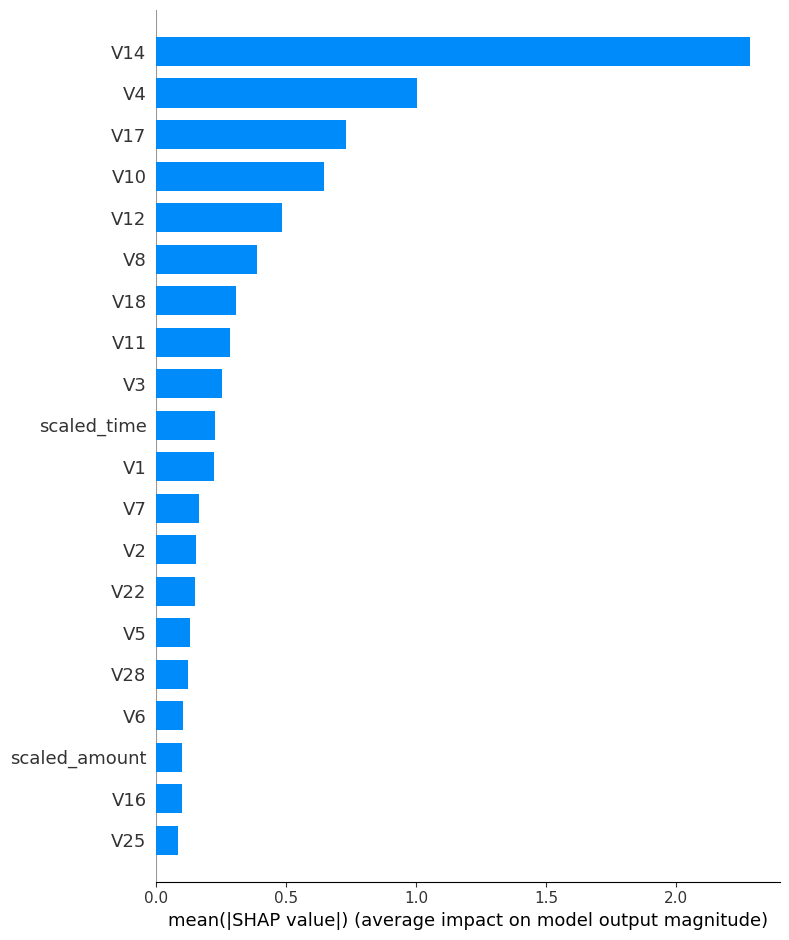

In [24]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [25]:
# Choose a suspicious transaction (e.g. with high risk score)
index = np.argmax(risk_score)  # or any custom index

shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    X_test.iloc[index]
)


In [26]:
import pandas as pd

# Load original dataset
df = pd.read_csv(r'dataset\creditcard.csv')

# Sample a few rows from both classes
sample_df = pd.concat([
    df[df['Class'] == 0].sample(5),
    df[df['Class'] == 1].sample(2)
])

# Drop 'Class' column to simulate real input
sample_df.drop('Class', axis=1, inplace=True)

# Save to CSV
sample_df.to_csv('sample_test.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'dataset\\creditcard.csv'

# 📌 Conclusion:

This notebook demonstrates how to effectively detect credit card fraud using a combination of:
- Supervised learning with XGBoost (for classification)
- Unsupervised learning with Autoencoder (for anomaly detection)

The final hybrid model leverages both techniques to improve robustness against unseen fraud patterns.
